In [1]:
!pip install pycaret[full]

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import pandas as pd
data=pd.read_csv('/content/gdrive/MyDrive/DM_Assignment2/sales_data_with_exogenous_variables.csv')
data.head()

,Date,Sales,Advertisement_Spend,Holidays
0,2019-01-31,152.921570,2174.087481,0.0
1,2019-02-28,165.895884,3303.249877,0.0
2,2019-03-31,232.376565,2935.387646,0.0
3,2019-04-30,310.311195,4089.030466,0.0
4,2019-05-31,326.758690,3133.255518,0.0


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Sales,Advertisement_Spend,Holidays
0,2019-01-31,152.921570,2174.087481,0.0
1,2019-02-28,165.895884,3303.249877,0.0
2,2019-03-31,232.376565,2935.387646,0.0
3,2019-04-30,310.311195,4089.030466,0.0
4,2019-05-31,326.758690,3133.255518,0.0


<Axes: >

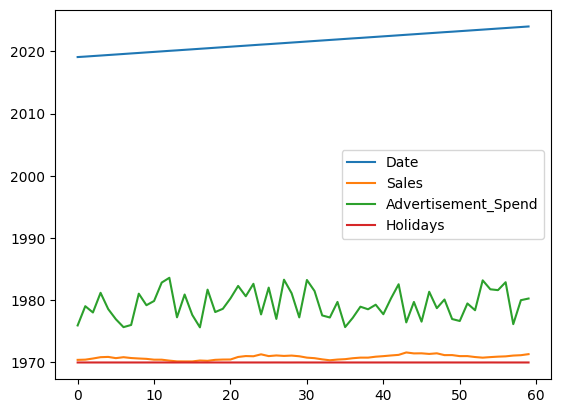

In [5]:
data.plot()

In [6]:
from pycaret.time_series import *
s = setup(data, fh = 12, use_gpu=True,target='Sales')

,Description,Value
0,session_id,2269
1,Target,Sales
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(60, 4)"
5,Transformed data shape,"(60, 4)"
6,Transformed train set shape,"(48, 4)"
7,Transformed test set shape,"(12, 4)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Th

In [7]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,60.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,302.300019
3,Summary,Statistics,Transformed,Median,,312.810291
4,Summary,Statistics,Transformed,Standard Deviation,,132.57297
5,Summary,Statistics,Transformed,Variance,,17575.592346
6,Summary,Statistics,Transformed,Kurtosis,,-0.734959
7,Summary,Statistics,Transformed,Skewness,,0.033395
8,Summary,Statistics,Transformed,# Distinct Values,,60.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",184.504671


In [8]:
best_model = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
croston,Croston,2.0525,1.9703,133.6834,155.8779,0.5634,0.5028,-1.0677,0.0500
naive,Naive Forecaster,2.1466,2.0796,139.7484,164.6670,0.5640,0.5223,-1.5054,0.1333
grand_means,Grand Means Forecaster,2.2054,2.0840,143.5695,164.7572,0.6374,0.5400,-1.3062,0.0500
snaive,Seasonal Naive Forecaster,2.2065,2.1285,143.6422,168.6140,0.5776,0.5405,-1.6536,0.1000
stlf,STLF,2.4561,2.4054,160.3781,191.4400,0.6686,0.5553,-2.2437,0.0800


Processing:   0%|          | 0/105 [00:00<?, ?it/s]

In [10]:
plot_model(best_model, plot = 'forecast', data_kwargs = {'fh' : 24})

In [12]:
plot_model(best_model, plot = 'residuals')

In [13]:
turned_model=tune_model(best_model)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,11.0000,1.7084,1.5926,109.3962,118.0408,0.9913,0.6168,-0.1064
1,23.0000,1.7724,1.7097,117.6551,139.8567,0.3639,0.4185,-0.6157
2,35.0000,2.6695,2.5687,173.4593,206.3573,0.3612,0.4708,-2.3975
Mean,nan,2.0501,1.9570,133.5035,154.7516,0.5721,0.5020,-1.0399
SD,nan,0.4388,0.4352,28.4535,37.5619,0.2964,0.0839,0.9822


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.6s finished


In [14]:
predict_model(turned_model, fh = 24)

,y_pred
48,418.4034
49,418.4034
50,418.4034
51,418.4034
52,418.4034
53,418.4034
54,418.4034
55,418.4034
56,418.4034
57,418.4034


In [15]:
turned_model

Croston(smoothing=0.11925777062937362)

In [16]:
plot_model(turned_model,plot='acf')

In [17]:
save_model(turned_model,model_name='TimeSeries')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 Croston(smoothing=0.11925777062937362))]))]),
 'TimeSeries.pkl')